In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd


wave1 = pd.read_csv('../Dataset/wave1.csv')
wave2 = pd.read_csv('../Dataset/wave2.csv')
wave3 = pd.read_csv('../Dataset/wave3.csv')
wave4 = pd.read_csv('../Dataset/wave4.csv')

#### Hypothesis: The distribution of working situations and sectors among survey respondents has changed significantly from Wave 1 to Wave 4, reflecting the evolving impact of the COVID-19 pandemic on employment dynamics.

#### Null Hypothesis (H0): There is no significant difference in the distribution of working situations and sectors from Wave 1 to Wave 4.

#### Alternative Hypothesis (H1): There is a significant difference in the distribution of working situations and sectors between Wave 1 to Wave 4.

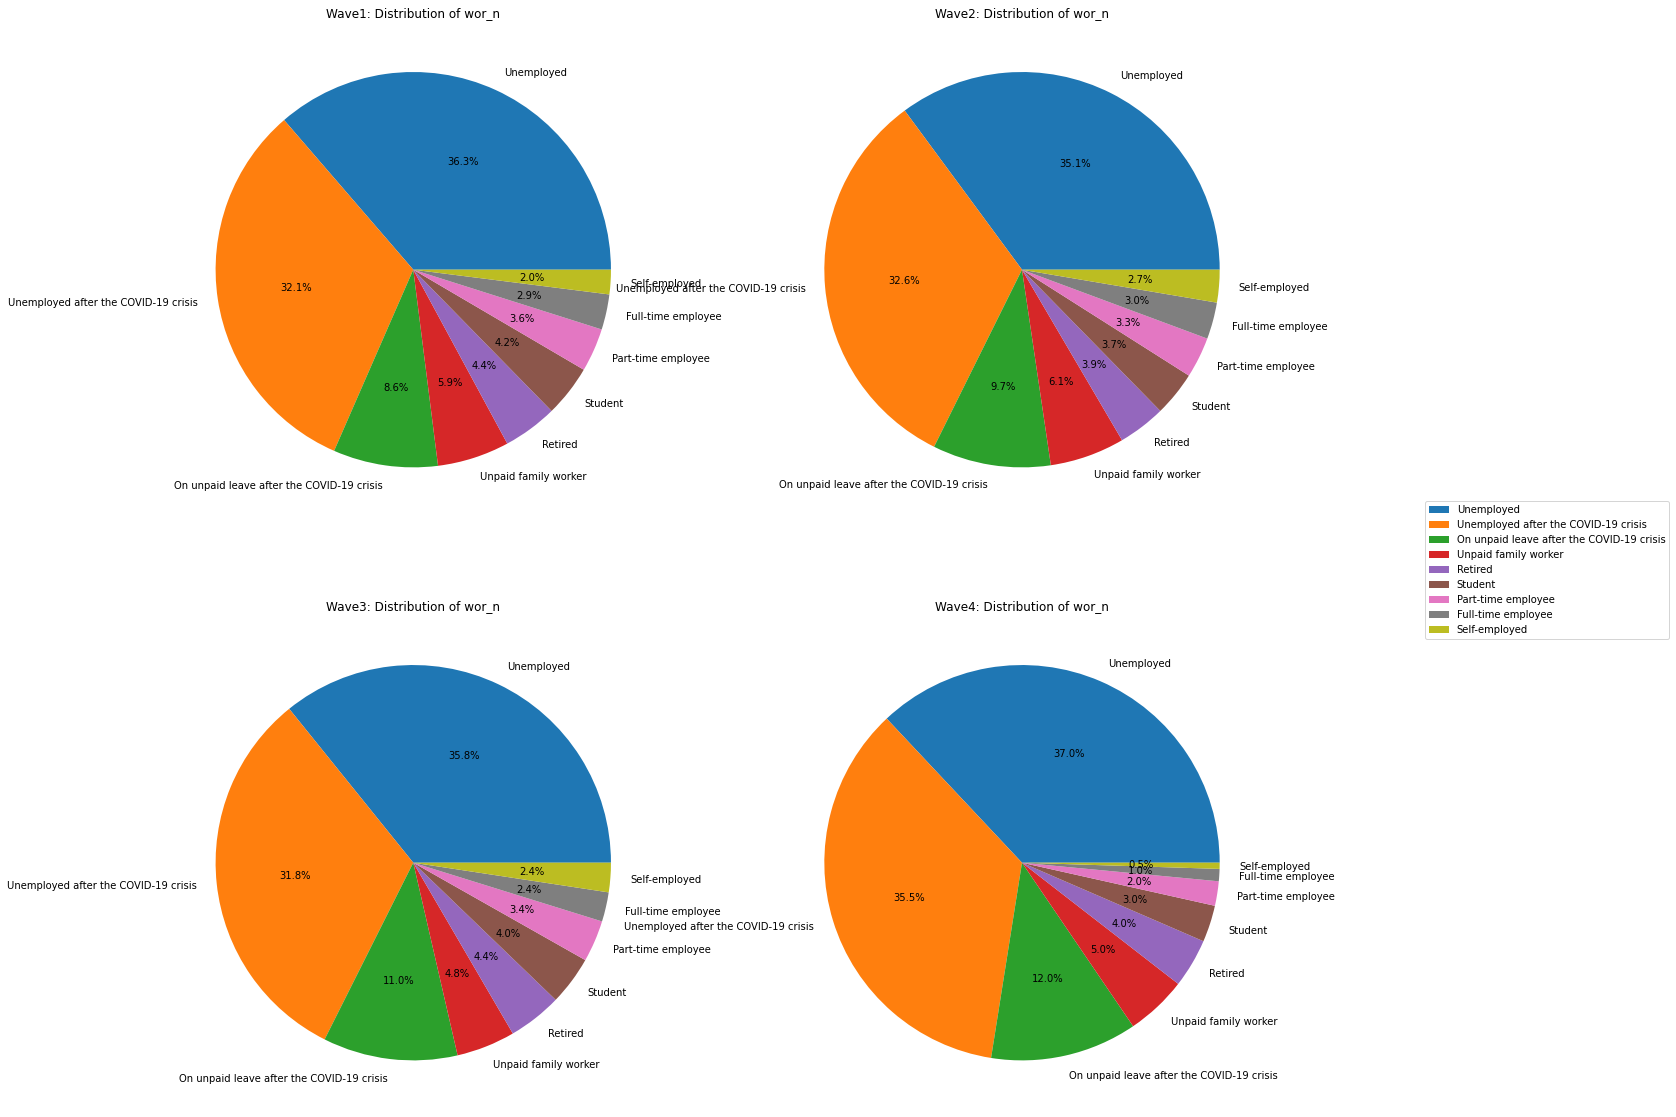

In [2]:
import seaborn as sns
working_labels = ['Unemployed', 'Unemployed after the COVID-19 crisis', 'On unpaid leave after the COVID-19 crisis',
                  'Unpaid family worker', 'Retired', 'Student', 'Part-time employee',
                  'Full-time employee', 'Self-employed']
# Use colors from the tab10 colormap
colors = plt.cm.tab10.colors[:len(working_labels)]
# Sample 200 entries from both wave1 and wave4

sample_wave1 = wave1.sample(n=900, random_state=42)
sample_wave2 = wave2.sample(n=900, random_state=42)
sample_wave3 = wave3.sample(n=500, random_state=42)
sample_wave4 = wave4.sample(n=200, random_state=42)
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 20))

# Plot pie chart for wave1
axes[0, 0].pie(sample_wave1['wor_n'].value_counts(), labels=working_labels,
               autopct='%1.1f%%', colors=colors)
axes[0, 0].set_title('Wave1: Distribution of wor_n')

# Plot pie chart for wave2
axes[0, 1].pie(sample_wave2['wor_n'].value_counts(), labels=working_labels,
               autopct='%1.1f%%', colors=colors)
axes[0, 1].set_title('Wave2: Distribution of wor_n')

# Plot pie chart for wave3
axes[1, 0].pie(sample_wave3['wor_n'].value_counts(), labels=working_labels,
               autopct='%1.1f%%', colors=colors)
axes[1, 0].set_title('Wave3: Distribution of wor_n')

# Plot pie chart for wave4
axes[1, 1].pie(sample_wave4['wor_n'].value_counts(), labels=working_labels,
               autopct='%1.1f%%', colors=colors)
axes[1, 1].set_title('Wave4: Distribution of wor_n')

# Add legend
fig.legend(working_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [3]:
# chi-square test for wave1 and wave4
from scipy.stats import chi2_contingency

# contingency table
contingency12 = pd.crosstab(sample_wave1['wor_n'], sample_wave2['wor_n'])

print("From wave1 to wave2\n")
chi2, p, dof, expected = chi2_contingency(contingency12)
print('Chi-square statistic:', chi2)
print('p-value:', p)

# chi-square test for wave2 and wave3
# contingency table
contingency23 = pd.crosstab(sample_wave2['wor_n'], sample_wave3['wor_n'])
print("\nFrom wave2 to wave3\n")
chi2, p, dof, expected = chi2_contingency(contingency23)
print('Chi-square statistic:', chi2)
print('p-value:', p)

# chi-square test for wave3 and wave4
# contingency table
contingency34 = pd.crosstab(sample_wave3['wor_n'], sample_wave4['wor_n'])
print("\nFrom wave3 to wave4\n")
chi2, p, dof, expected = chi2_contingency(contingency34)
print('Chi-square statistic:', chi2)
print('p-value:', p)





From wave1 to wave2

Chi-square statistic: 84.56675485639165
p-value: 0.04357732210788379

From wave2 to wave3

Chi-square statistic: 80.21565452113265
p-value: 0.08298243945319692

From wave3 to wave4

Chi-square statistic: 39.435159398027565
p-value: 0.9933149021192091


Both tests show that the there is no significant difference of workign situation between two waves ( wave1 and wave4 ). So we can say that the working situation of the people in the two waves are very similar. We can reject the null hypothesis.